In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import HTML
from datasets.utils.waveform import WaveformLoader

In [2]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [3]:
SAMPLE_RATE = 16_000
CHUNK_DURATION = 5
audio_loader = WaveformLoader(sample_rate=SAMPLE_RATE)

Initializing PreprocessingWaveformLoader with sample rate sr:16000...


## 1 - Invertibility Test

In [18]:
audio_pathes = {
    1:"audio/invertibility/p232_001.wav",
    2:"audio/invertibility/p232_002.wav",
    3:"audio/invertibility/15033000.mp3",
    4:"audio/invertibility/16366200.mp3",
    5:"audio/invertibility/16129994.mp3",
    6:"audio/invertibility/16176213.mp3",
}

audio_path = audio_pathes[6]
audio_path = "audio/kyara-world-edge.mp3"
audio_path = "audio/miami-nights-1984-accelerated.mp3"
#audio_path = "audio/Sessionbuilder-preview.mp3"
#audio_path = "audio/backwhen-watermane-deep-water.mp3"
#audio_path = "audio/astronautica-reasons.m4a"
waveform = audio_loader.load_segment(audio_path, offset=5, duration=5, nchannels=2)

ipd.Audio(waveform, rate=SAMPLE_RATE, autoplay=False)

In [19]:
loudness = audio_loader.measure_loudness(waveform)

waveform_1 = audio_loader.normalise_loudness(waveform, loudness, -14)
loudness_1 = audio_loader.measure_loudness(waveform_1)

waveform_2 = audio_loader.normalise_loudness(waveform, loudness, -23)
loudness_2 = audio_loader.measure_loudness(waveform_2)


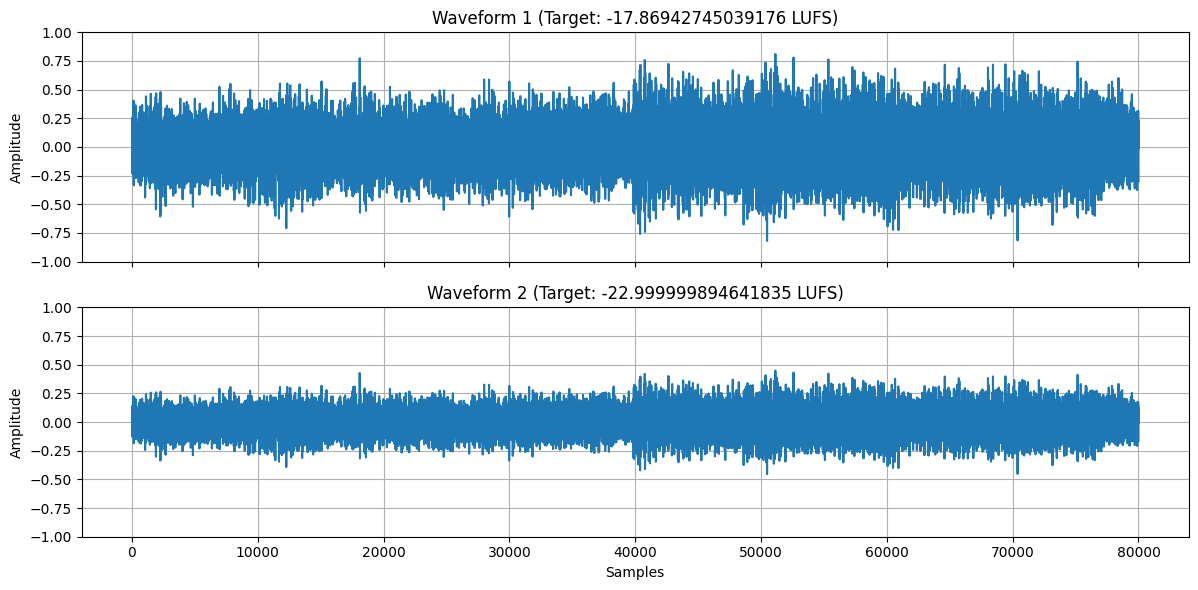

In [20]:
import matplotlib.pyplot as plt

# Assuming you have waveform_1 and waveform_2 from your code
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)

max_samples = SAMPLE_RATE * 5
start = SAMPLE_RATE * 0

ax[0].plot(waveform_1[0, start:start + max_samples]) # Use .T to plot channels if shape is (channels, samples)
ax[0].set_title(f"Waveform 1 (Target: {loudness_1} LUFS)")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True)

ax[1].plot(waveform_2[0,start:start + max_samples])
ax[1].set_title(f"Waveform 2 (Target: {loudness_2} LUFS)")
ax[1].set_xlabel("Samples")
ax[1].set_ylabel("Amplitude")
ax[1].grid(True)

plt.ylim(-1.0, 1.0) # Set y-axis to the full possible range
plt.tight_layout()
plt.show()

In [ ]:
# import soundfile as sf
# sf.write("demo1.wav", waveform_1.T, SAMPLE_RATE, subtype='FLOAT', format="wav")
# sf.write("demo2.wav", waveform_2.T, SAMPLE_RATE, subtype='FLOAT', format="wav")